# Praktikum Pertemuan 09 | Praktikum Mandiri

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: ML Pagi - 2022**

---

# 1. Import Library

In [4]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Mengimport library yang dibutuhkan selama analisis berlangsung.

# 2. Loading Dataset

In [6]:
# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
import os

# Memanggil dataset melax`lui gdrive
path = "gdrive/MyDrive/MachineLearning/praktikum09/data/"

# Membaca file csv
df = pd.read_csv(path + 'data.csv')
df

Mounted at /content/gdrive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Melakukan load dataset dengan Google Drive.

# 3. Informasi Detail Dataset (df.info())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Output di atas menunjukkan bahwa dataset memiliki total 569 baris dan 33 kolom, lengkap dengan nama kolom dan tipe datanya. Hampir semua kolom berisi angka bertipe float, kecuali kolom id yang bertipe integer dan diagnosis yang bertipe object.

# 4. Melihat Missing Value

In [8]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Output di atas menunjukkan bahwa hampir semua kolom berisi 0 missing value, kecuali kolom Unnamed: 32 yang memiliki 569 missing value, langkah selanjutnya kolom Unnamed akan di drop karena tidak terlalu dibutuhkan dalam analisis.

# 5. Drop Kolom

In [9]:
# Hapus kolom id & kolom kosong
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

Menghapus kolom id dan Unnamed: 32.

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Mengecek kembali list kolom yang tersisa setelah kolom id dan unnamed dibuang.

# 6. Encode Diagnosis Label

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


Mengubah nilai pada kolom diagnosis dari huruf menjadi angka, yaitu M menjadi 1 dan B menjadi 0, agar mudah diproses oleh model machine learning. Hasil data untuk setiap kelas menunjukkan bahwa terdapat 357 data benign (0) dan 212 data malignant (1).

# 7. Memisahkan Fitur (X) dan Label (y)

In [12]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

Memisahkan fitur dan label, yang mana variabel X menyimpan semua kolom kecuali diagnosis dan digunakan sebagai fitur. Sementara itu, variabel y hanya menyimpan kolom diagnosis sebagai label yang ingin diprediksi.

# 8. Split Data Train dan Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Membagi data menjadi dua bagian yaitu data latih (X_train, y_train) untuk melatih model dan data uji (X_test, y_test) untuk mengecek performa model.

# 9. Scalling

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler digunakan untuk menormalkan fitur sehingga semua kolom memiliki skala yang sama (rata-rata 0 dan standar deviasi 1), sehingga model lebih mudah belajar.

# 10. Train Model Naive Bayes

In [18]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

Membuat model Naive Bayes tipe Gaussian (GaussianNB) dan melatihnya menggunakan data latih yang sudah dinormalisasi beserta targetnya.

# 11. Evaluasi Model

In [19]:
y_pred = nb.predict(X_test_scaled)
print("Training Accuracy :", nb.score(X_train_scaled, y_train))
print("Testing Accuracy  :", accuracy_score(y_test, y_pred))

Training Accuracy : 0.945054945054945
Testing Accuracy  : 0.9210526315789473


Hasil akurasi model menunjukkan kinerja yang cukup bagus, dengan akurasi 94,5% pada data latih dan 92,1% pada data uji, artinya model mampu mengenali pola dengan baik tanpa overfitting yang signifikan.

# 12. Confusion Matrix

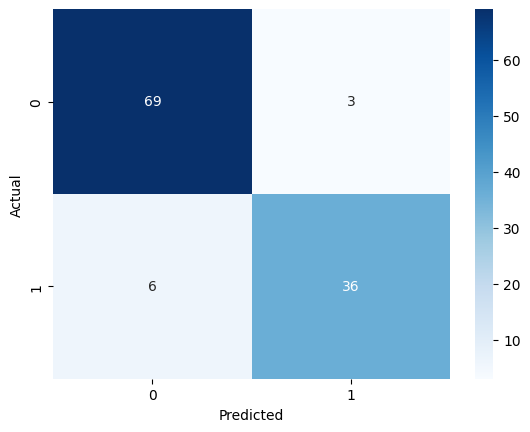

In [20]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion matrix digunakan untuk mengevaluasi prediksi model Naive Bayes. Output tersebut menunjukkan bahwa model memprediksi sebagian besar data dengan benar, 69 kasus kelas 0 benar, 36 kasus kelas 1 benar, tapi ada 3 dan 6 kasus yang salah prediksi.

# 13. Classification Report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Output di atas menunjukkan beberapa metrik yaitu precision, recall, dan f1-score untuk masing-masing kelas (0 dan 1). Terlihat bahwa kelas 0 memiliki akurasi tinggi sekitar (0.92), recall (0.96), dan f1-score (0.94), sedangkan kelas 1 sedikit lebih rendah. Secara keseluruhan, model ini akurat sekitar 92%, yang berarti prediksi model cukup baik dan seimbang antara kedua kelas.

# 14. Cross Validation

In [22]:
cv = cross_val_score(nb, X, y, cv=5)

print("Cross Validation Scores:", cv)
print("Mean Accuracy:", cv.mean())
print("Std Dev:", cv.std())

Cross Validation Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Dev: 0.014585994424363306


Melakukan cross-validation 5-fold untuk mengevaluasi model Naive Bayes (nb), data dibagi menjadi 5 bagian, lalu model dilatih dan diuji secara bergantian. Hasil Cross Validation menunjukkan akurasi di tiap fold, seperti rentang antara 0.92 hingga 0.96. Mean Accuracy 0.94 menunjukkan rata-rata akurasi model di semua fold, sedangkan Std Dev 0.015 menandakan variasi akurasi antar fold sangat kecil, jadi model cukup konsisten.

# Kesimpulan Tugas

*   Dataset Breast Cancer berhasil dimuat, dibersihkan, dan dianalisis secara eksploratori.
*   Tidak terdapat missing value signifikan. Kolom id dan Unnamed: 32 dihapus karena tidak relevan.
*   Target diagnosis di-encode menjadi nilai biner (0 = Benign, 1 = Malignant).
*   Seluruh fitur numerik distandarisasi menggunakan StandardScaler karena GaussianNB sensitif terhadap skala data.
*   Model Gaussian Naïve Bayes dilatih dan dievaluasi dengan hasil sebagai berikut:
    *   Akurasi data latih : 0.9451
    *   Akurasi data uji : 0.9211
    *   Rata-rata Cross-Validation (5-fold) : 0.9385
*  Confusion matrix dan classification report menunjukkan performa sangat baik pada kedua kelas.
